<a href="https://colab.research.google.com/github/knaat/UCI-Heart-disease/blob/main/JADS_Discover_UCI_Heart_disease_exercise_1_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://raw.githubusercontent.com/knaat/UCI-Heart-disease/jesse-orrico-Us3AQvyOP-o-unsplash.jpg)

## Context

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

## Content
Attribute Information:

```code
1. age
2. sex (1 = male; 0 = female)
3. cp - chest pain type (4 values - 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps)
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - cholesterol (serum cholestoral in mg/dl)
6. fbs - fasting blood sugar (fasting blood sugar > 120 mg/dl - 1 = true; 0 = false)
7. restecg - resting electrocardiographic results (values 0,1,2 - 0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST, elevation or depression of > 0.05 mV) 2: showing probable or definite left ventricular hypertrophy by Estes\' criteria)
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope - the slope of the peak exercise ST segment ( 1: upsloping, 2: flat, 3: downsloping)
12. ca - number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: (0: no  1: yes)
```

## Exercises

### Exercise 1
Provide a table with descriptive statistics for all included variables and check:

  - Classes of each of the variables (e.g. factors or continuous variables)
  - Change the class of the "target" variable such that it is a binary factor
  - Descriptive/summary statistics for all continuous variables (e.g. mean, SD, range) and factor variables (e.g. frequencies)
  - Explore missing values
  
### Exercise 2
The variable "target" refers to the presence of heart disease and hence is the variable of interest for our prediction model ("Y" or dependent variable). The frequency of the outcomes (heart disease yes/no) was already determined in the previous code blocks. Please further explore Y in terms of:

  - Describe X-variables separately for both outcome categories
  - Draw a correlation plot to see all correlations between Y and the independent (numeric) variables
  - Visualize the relation between Y and a few correlated X-variables (i.e. create boxplot or scatterplot)

### Exercise 3

  - Estimate with a number of classifiers
  - Assess which model performs best
  - Optimise parameters of a selected classifier

## Acknowledgements
Creators:

  - Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
  - University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
  - University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
  - V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: David W. Aha (aha@ics.uci.edu)

Photo by [Jesse Orrico](https://unsplash.com/@jessedo81?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText) on [Unsplash](https://unsplash.com/collections/9716108/doctors?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText)



References used:

https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74


In [1]:
import os
import warnings

import pandas as pd
print('\nUsing Pandas version\t',pd.__version__)

import numpy as np
print('Using Numpy version\t',np.version.version)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
print('Using Matplotlib version',matplotlib.__version__)

import seaborn as sns
print('Using Seaborn version\t',sns.__version__)

import sklearn

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

print('Using ScikitLearn version', sklearn.__version__)



Using Pandas version	 1.1.5
Using Numpy version	 1.18.5
Using Matplotlib version 3.2.2
Using Seaborn version	 0.11.0
Using ScikitLearn version 0.22.2.post1


In [2]:
def expl_df(df_input, name):
    
    """ Prints analysis of dataframe 'df_input' with name 'name' and returns lists of numeric, categorical, complete,
        incomplete features, features with many zeros and features with high skew > 0.75. """

    print('\n\033[1mDataframe analysis for dataframe:  ',name,'\033[0m\n')

    # Print dimensions of dataframe
    num_rows = df_input.shape[0]
    num_cols = df_input.shape[1]
    print('Dataframe',name,'has', num_rows, 'rows and', num_cols,'columns\n')

    # Check which features are numeric and which features are categorical 
    num_features = list(df_input.select_dtypes(include=['int64','float64']).columns)
    cat_features = list(df_input.select_dtypes(include=['object', 'category']).columns)
    print('Dataframe',name,'has', len(num_features) , 'numeric features and', len(cat_features),'categorical features\n')

    # Check which features have missing values and might need attention and print number of features
    count_values_feature=df_input.count()

    complete_features = list(count_values_feature[count_values_feature == num_rows].index)
    incomplete_features = list(count_values_feature[count_values_feature < num_rows].index)
    print('Dataframe',name,'has',len(complete_features), 'complete features and', len(incomplete_features),'incomplete features\n')

    # Calculate skew for each numeric feature and select features with skew>0.75 
    calc_skew_feature = df_input[num_features].skew()
    skew_features = list(calc_skew_feature[calc_skew_feature > 0.75].index)
    print('Dataframe',name,'has',len(skew_features), 'numeric features with a skew > 0.75\n')
    
    return num_features, cat_features, incomplete_features, complete_features,skew_features

In [3]:
#
# Read UCI Heart disease dataset
#

df = pd.read_csv("https://raw.githubusercontent.com/knaat/UCI-Heart-disease/main/heart.csv")

# Making the column names a bit more self-explanatory
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_heart_rate_achieved,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exercise_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
st_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
num_feat,cat_feat,incomp_feat,comp_feat,skew_feat = expl_df(df,'df')


Dataframe analysis for dataframe:   df 

Dataframe df has 303 rows and 14 columns

Dataframe df has 14 numeric features and 0 categorical features

Dataframe df has 14 complete features and 0 incomplete features

Dataframe df has 4 numeric features with a skew > 0.75



In [7]:
skew_feat

['cholesterol', 'fasting_blood_sugar', 'st_depression', 'num_major_vessels']

### First pass analysis

* 13 features and one target. Data on 303 individuals. 

* All features are numeric whereas based on some non-ordinal descriptions you would expect some categorical types. => Address in feature engineering

* No missing vales. 

* 4 features ['chol', 'fbs', 'oldpeak', 'ca'] have a skewed distribution. 

In [8]:
#
# Splitting dataset in 2 parts (target==0 and target==1) for separate analysis
#
df_target_0 = df.drop(df[df['target'] == 1].index, inplace=False).copy()
df_target_1 = df.drop(df[df['target'] == 0].index, inplace=False).copy()

In [9]:
print(f"Description of features for target==0\n") 
df_target_0.describe().transpose()

Description of features for target==0



,count,mean,std,min,25%,50%,75%,max
age,138.0,56.601449,7.962082,35.0,52.00,58.0,62.00,77.0
sex,138.0,0.826087,0.380416,0.0,1.00,1.0,1.00,1.0
chest_pain_type,138.0,0.478261,0.905920,0.0,0.00,0.0,0.00,3.0
resting_blood_pressure,138.0,134.398551,18.729944,100.0,120.00,130.0,144.75,200.0
cholesterol,138.0,251.086957,49.454614,131.0,217.25,249.0,283.00,409.0
fasting_blood_sugar,138.0,0.159420,0.367401,0.0,0.00,0.0,0.00,1.0
rest_ecg,138.0,0.449275,0.541321,0.0,0.00,0.0,1.00,2.0
max_heart_rate_achieved,138.0,139.101449,22.598782,71.0,125.00,142.0,156.00,195.0
exercise_induced_angina,138.0,0.550725,0.499232,0.0,0.00,1.0,1.00,1.0
st_depression,138.0,1.585507,1.300340,0.0,0.60,1.4,2.50,6.2


In [10]:
print(f"Description of features for target==1\n") 
df_target_1.describe().transpose()

Description of features for target==1



,count,mean,std,min,25%,50%,75%,max
age,165.0,52.496970,9.550651,29.0,44.0,52.0,59.0,76.0
sex,165.0,0.563636,0.497444,0.0,0.0,1.0,1.0,1.0
chest_pain_type,165.0,1.375758,0.952222,0.0,1.0,2.0,2.0,3.0
resting_blood_pressure,165.0,129.303030,16.169613,94.0,120.0,130.0,140.0,180.0
cholesterol,165.0,242.230303,53.552872,126.0,208.0,234.0,267.0,564.0
fasting_blood_sugar,165.0,0.139394,0.347412,0.0,0.0,0.0,0.0,1.0
rest_ecg,165.0,0.593939,0.504818,0.0,0.0,1.0,1.0,2.0
max_heart_rate_achieved,165.0,158.466667,19.174276,96.0,149.0,161.0,172.0,202.0
exercise_induced_angina,165.0,0.139394,0.347412,0.0,0.0,0.0,0.0,1.0
st_depression,165.0,0.583030,0.780683,0.0,0.0,0.2,1.0,4.2


### Analysis of features split out by target

* More balanced male-female distribution for target 1. For target 0 skewed towards men. Unexpected.

* Slightly younger mean age for target 1. Unexpected.

* Slightly higher mean resting blood pressure for target 0. Unexpected.

* Slightly higher mean cholesterol for target 0. Unexpected.

* Slightly higher mean heart rate achieved for target 1. As expected?

All in all a bit of a confusing picture. 


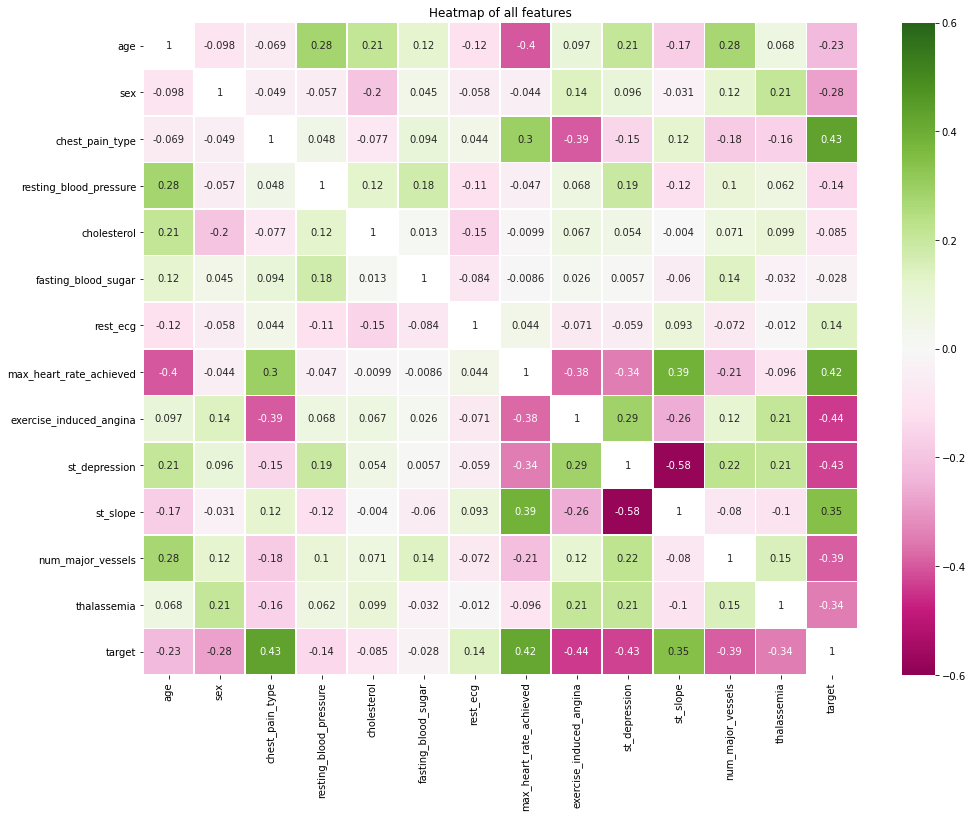

In [11]:
#
# Calculating and plotting a correlation matrix 
#

# Calculating the correlation matrix 
corr_matrix = df.corr()

# Set figure size for seaborn heatmap plot
plt.figure(figsize=(16, 12))

# Create good colormap for heatmap by selecting a colormap with white in middle and set highest positive value
# to white to 'blank' the diagonal
heat_cmap = matplotlib.cm.get_cmap('PiYG')
heat_cmap.set_over('w')

#
#Create heatmap plot with pastel colors for low negative and positive correlation coefficients and
# darker green and magenta for higher values.
#
# Set scale to create a symmetric distribution.
#
heat_plot = sns.heatmap(corr_matrix, annot=True, linewidths=.5, robust=True, cmap=heat_cmap, vmin=-0.6, vmax=0.6)

# Set the plot title. Use None to prevent text to stdout. 
heat_plot.set_title("Heatmap of all features")
None

### Heatmap analysis - all data

* Features with a higher positive correlation (>0.3) with target: cp, thalach, slope.

* Features with a higher negative correlation (<-0.3) with target: exang, oldpeak, ca, thal.

* Strong negative correlation (-0.58) and possibly colinear features: slope & oldpeak

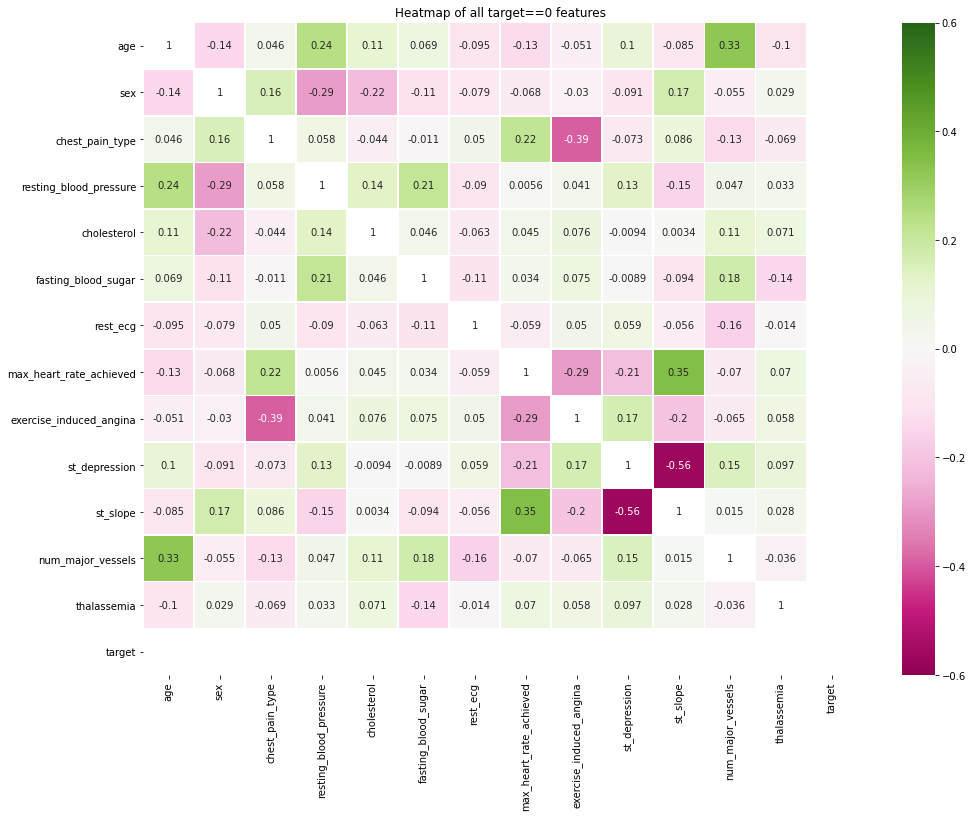

In [12]:
#
# Calculating and plotting a correlation matrix for target==0 
#

# Calculating the correlation matrix 
corr_matrix = df_target_0.corr()

# Set figure size for seaborn heatmap plot
plt.figure(figsize=(16, 12))

# Create heatmap plot with pastel colors for low negative and positive correlations and darker green and magenta for higher values.
# Hard coded scale to create a symmetric distribution.
g = sns.heatmap(corr_matrix, annot=True, linewidths=.5, robust=True, cmap=heat_cmap, vmin=-0.6, vmax=0.6)

# Set the plot title. Use None to prevent text to stdout. 
g.set_title("Heatmap of all target==0 features")
None

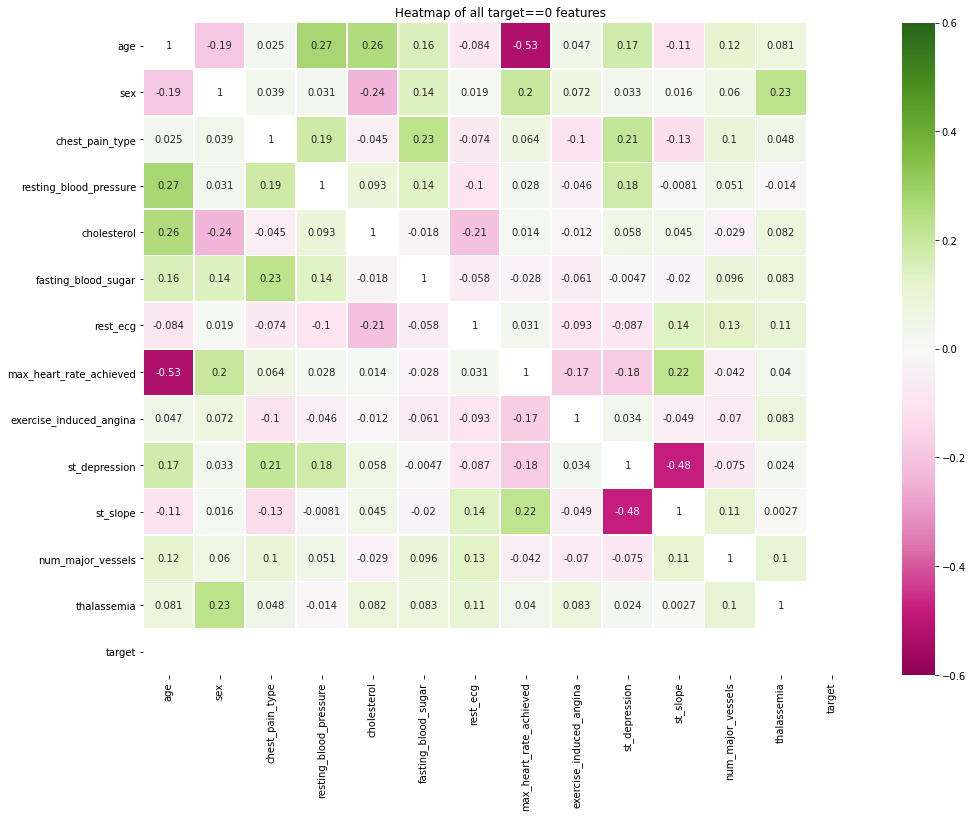

In [13]:
#
# Calculating and plotting a correlation matrix for target==1 
#

# Calculating the correlation matrix 
corr_matrix = df_target_1.corr()

# Set figure size for seaborn heatmap plot
plt.figure(figsize=(16, 12))

# Create heatmap plot with pastel colors for low negative and positive correlations and darker green and magenta for higher values.
# Hard coded scale to create a symmetric distribution.
g = sns.heatmap(corr_matrix, annot=True, linewidths=.5, robust=True, cmap=heat_cmap, vmin=-0.6, vmax=0.6)

# Set the plot title. Use None to prevent text to stdout. 
g.set_title("Heatmap of all target==0 features")
None

### Heatmap analysis for subsets

* Strong negative correlation (-0.53) and possibly colinear features: age & thalach for target==1 subset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

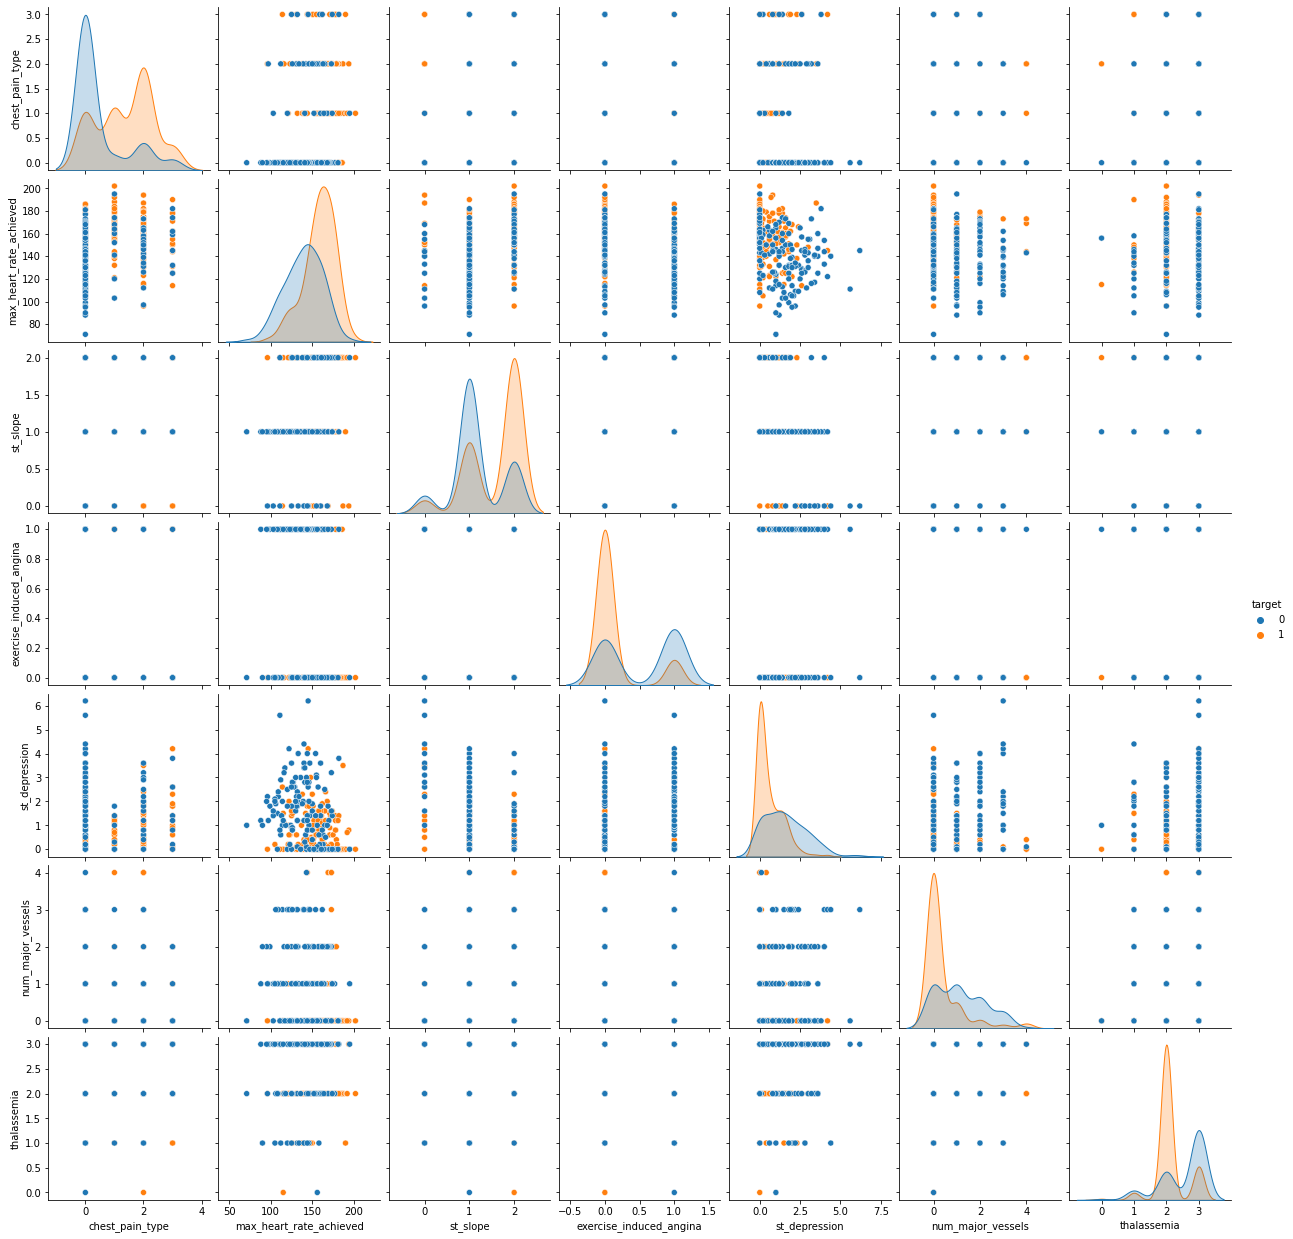

In [15]:
# Switch off warnings to avoid annoying warnings
warnings.filterwarnings('ignore')
sns.pairplot(df[['chest_pain_type', 'max_heart_rate_achieved', 'st_slope', 'exercise_induced_angina', 'st_depression', 'num_major_vessels', 'thalassemia', 'target']], hue='target')
# Switch on warnings
warnings.filterwarnings('default')


# Modeling

In [16]:
#
# Select which feature engineering steps you would like to apply. 
#   1. log transform of features with skew > 0.75.
#   2. Convert features with non-ordinal values to object data type and create dummies
#   3. Delete selected columns with low correlations coefficients
#
log_transform = False
conv_to_cat = False
del_cols = False
option_string='Feature engineering steps applied: '

#
# Read UCI Heart disease dataset again to start with fresh dataset
#
df = pd.read_csv("https://raw.githubusercontent.com/knaat/UCI-Heart-disease/main/heart.csv")

# Make the column names a bit more self-explanatory
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [17]:
#
# 1. log transform of features with skew > 0.75.
#

if log_transform:
    # Determine numeric columns
    num_cols = df.select_dtypes(include='number').columns

    # Calculate skew for each numeric feature and select features with skew>0.75 
    calc_skew_col = df[num_cols].skew()
    skew_cols = list(calc_skew_col[calc_skew_col > 0.75].index)

    print(f"\nLog transforming following features: {skew_cols}\n")
    option_string = option_string + ' Log transform '
    
    for column in skew_cols:
        df.loc[:,column] = np.log(df[column]+0.00000001)

In [18]:
#
# 2. Convert non-ordinal features to object data type and create dummies
#
# Switch off warnings to avoid annoying warnings
warnings.filterwarnings('ignore')

if conv_to_cat:
    df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
    df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
    df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
    df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

    df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
    df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
    df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

    df['st_slope'][df['st_slope'] == 1] = 'upsloping'
    df['st_slope'][df['st_slope'] == 2] = 'flat'
    df['st_slope'][df['st_slope'] == 3] = 'downsloping'

    df['thalassemia'][df['thalassemia'] == 1] = 'normal'
    df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
    df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'
    
    df['chest_pain_type'] = df['chest_pain_type'].astype('object')
    df['rest_ecg'] = df['rest_ecg'].astype('object')
    df['st_slope'] = df['st_slope'].astype('object')
    df['thalassemia'] = df['thalassemia'].astype('object')
    
    df = pd.get_dummies(df, drop_first=False)
    print(f"\nConverted non-ordinal features to object data type\n")
    option_string = option_string + ' Conversion to object and creation of dummies '

# Switch on warnings
warnings.filterwarnings('default')


In [19]:
#
# 3. Delete selected columns with low correlations coefficients
#
if del_cols:
    # Drop columns 
    drop_cols = ['fasting_blood_sugar','rest_ecg_left ventricular hypertrophy','rest_ecg_normal','cholesterol']    
    df.drop(columns=drop_cols, inplace=True)
    print(f"\nDropping columns {drop_cols}\n")
    option_string = option_string + ' Columns with low correlations coefficients dropped'

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [21]:
#
# Define feature set X and target y and split in random training and testing datasets
#
X= df.drop(columns=['target'], inplace=False).copy()
y= df['target'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

### Confusion Matrix, precision and recall

The confusion Matrix is defined as: $\left(\begin{array}{cc}True Neg & False Pos\\False Neg & True Pos\end{array}\right)$ or in abbreviated form: $\left(\begin{array}{cc}TN & FP\\FN & TP\end{array}\right)$.

Precision is defined as $\frac{(TruePos)}{(TruePos +FalsePos)}$ or $\frac{(TP)}{(TP +FP)}$

Recall is defined as $\frac{(TruePos)}{(TruePos +FalseNeg)}$ or $\frac{(TP)}{(TP +FN)}$


Precision can be used as model metric to select the best model when there is a high cost associated with a False Positive .

Recall can be used as model metric to select the best model when there is a high cost associated with a False Negative.

In code:

```code
cm = confusion_matrix(y_test, y_pred)

TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

precision = TP / (TP+FP)
recall    = TP / (TP+FN)
```





    Overview of Precision and Recall for each classifier followed by confusion matrix for each
    Classifier : LogisticRegression              Precision : 0.78              Recall : 0.89           
    Classifier : RandomForestClassifier          Precision : 0.80              Recall : 0.87           
    Classifier : GaussianNB                      Precision : 0.77              Recall : 0.87           
    Classifier : KNeighborsClassifier            Precision : 0.64              Recall : 0.77           
    Classifier : GradientBoostingClassifier      Precision : 0.80              Recall : 0.87           
    Classifier : SVC                             Precision : 0.72              Recall : 0.94           

    Feature engineering steps applied: 



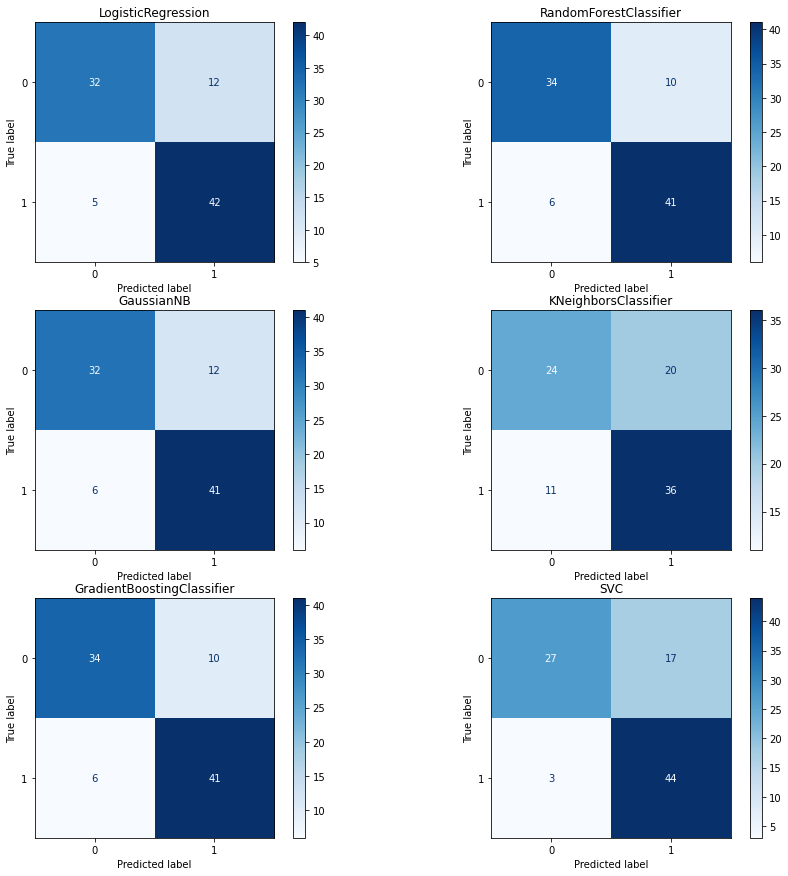

In [22]:
#
# Run 6 different classifiers and print precision and recall and plot confusion matrices for each 
#

classifiers = [LogisticRegression(max_iter=5000), 
               RandomForestClassifier(criterion='entropy', random_state=0),
               GaussianNB(),
               KNeighborsClassifier(11),
               GradientBoostingClassifier(), 
               SVC(kernel='linear', C=0.01)
               ]

for cls in classifiers:
    cls.fit(X_train, y_train)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

print(f'\n\033[1m    Overview of Precision and Recall for each classifier followed by confusion matrix for each\033[0m')
for cls, ax in zip(classifiers, axes.flatten()):
    disp=plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         normalize=None)
    ax.title.set_text(type(cls).__name__) 
    
    cm=disp.confusion_matrix

    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]

    precision = tp / (tp+fp)
    recall    = tp / (tp+fn)

    print(f'    Classifier : {type(cls).__name__:<30}  Precision : {precision:<15.2f}   Recall : {recall:<15.2f}')
    
print(f'\n    {option_string}\n')
plt.show()

### Result analysis
* Best Precision performance from RandomForest and GradientBoosting classifiers. 
* Best Recall performance from SVC (0.94, with only 3 False negatives)

Limited impact of feature engineering.

***

### RandomForestClassifier hyperparameters - try to improve performance by optimising hyperparameters
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
5. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

In [23]:
#
# Define function to evaluate a model and return confusion matrix, precision and recall
#
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]

    precision = tp / (tp+fp)
    recall    = tp / (tp+fn)

    return cm, precision, recall


In [24]:
#
# Run 'Base' RandomForestClassifier with default parameters
#

clf_base = RandomForestClassifier(random_state=0)
      
clf_base.fit(X_train, y_train)

base_cm, base_precision, base_recall = evaluate(clf_base, X_test, y_test)


In [41]:
#
# Use Random search to find hyperparameters for Grid Search
#

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Initiate the RandomForestClassifier model 
clf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

random_search = RandomizedSearchCV(estimator = clf, scoring='recall', param_distributions = random_param, n_iter = 50, cv = 3, verbose=2,random_state=0, n_jobs = -1)

# Fit the random search to the data
random_search.fit(X_train, y_train)
random_search.best_params_
best_random = random_search.best_estimator_

# Evaluate best model 
rand_cm, rand_precision, rand_recall = evaluate(best_random, X_test, y_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.0min finished


In [42]:
random_search.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [43]:
#
# Create the parameter grid based on the results of random search to set up a gridsearch
#

param_grid = {
    'bootstrap': [True],
    'max_depth': [1, 2, 3],
    'max_features': ['auto'],
    'min_samples_leaf': [7, 8, 9],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [2000, 2200, 2400]
}

# Initiate the RandomForestClassifier model 
clf = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator = clf, scoring='recall', param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_

# Evaluate best model 
grid_cm, grid_precision, grid_recall = evaluate(best_grid, X_test, y_test)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  8.0min finished


In [39]:
print(f'\n\033[1mOverview of Precision and Recall for several classificsation runs with RandomForestClassifier\033[0m')
print(f'Classifier : {type(clf).__name__:<25} Base model      Precision : {base_precision:<8.2f}   Recall : {base_recall:<8.2f}')
print(f'Classifier : {type(clf).__name__:<25} Random search   Precision : {rand_precision:<8.2f}   Recall : {rand_recall:<8.2f}')
print(f'Classifier : {type(clf).__name__:<25} Grid search     Precision : {grid_precision:<8.2f}   Recall : {grid_recall:<8.2f}')


print(f'\nBase Confusion matrix')
print(f'{base_cm[0]}')
print(f'{base_cm[1]}')

print(f'\nRandom Search Confusion matrix')
print(f'{rand_cm[0]}')
print(f'{rand_cm[1]}')

print(f'\nGrid Search Confusion matrix')
print(f'{grid_cm[0]}')
print(f'{grid_cm[1]}')


Overview of Precision and Recall for several classificsation runs with RandomForestClassifier
Classifier : RandomForestClassifier    Base model      Precision : 0.80       Recall : 0.91    
Classifier : RandomForestClassifier    Random search   Precision : 0.79       Recall : 0.89    
Classifier : RandomForestClassifier    Grid search     Precision : 0.78       Recall : 0.91    

Base Confusion matrix
[33 11]
[ 4 43]

Random Search Confusion matrix
[33 11]
[ 5 42]

Grid Search Confusion matrix
[32 12]
[ 4 43]


In [35]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}